<a href="https://colab.research.google.com/github/smit977/Linear_Regression-Problem-solving-and-Prediction-/blob/master/price_pediction_for_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REAL ESTATE PRICE **PREDICTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
import random
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [3]:
housing= pd.read_csv("/content/drive/My Drive/Colab/data_price.csv")


In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.shape

(506, 14)

In [6]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#filling null values
housing.RM.fillna(housing.RM.mean(),inplace=True)

In [8]:
housing.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59c1ed5be0>,
      dtype=object)

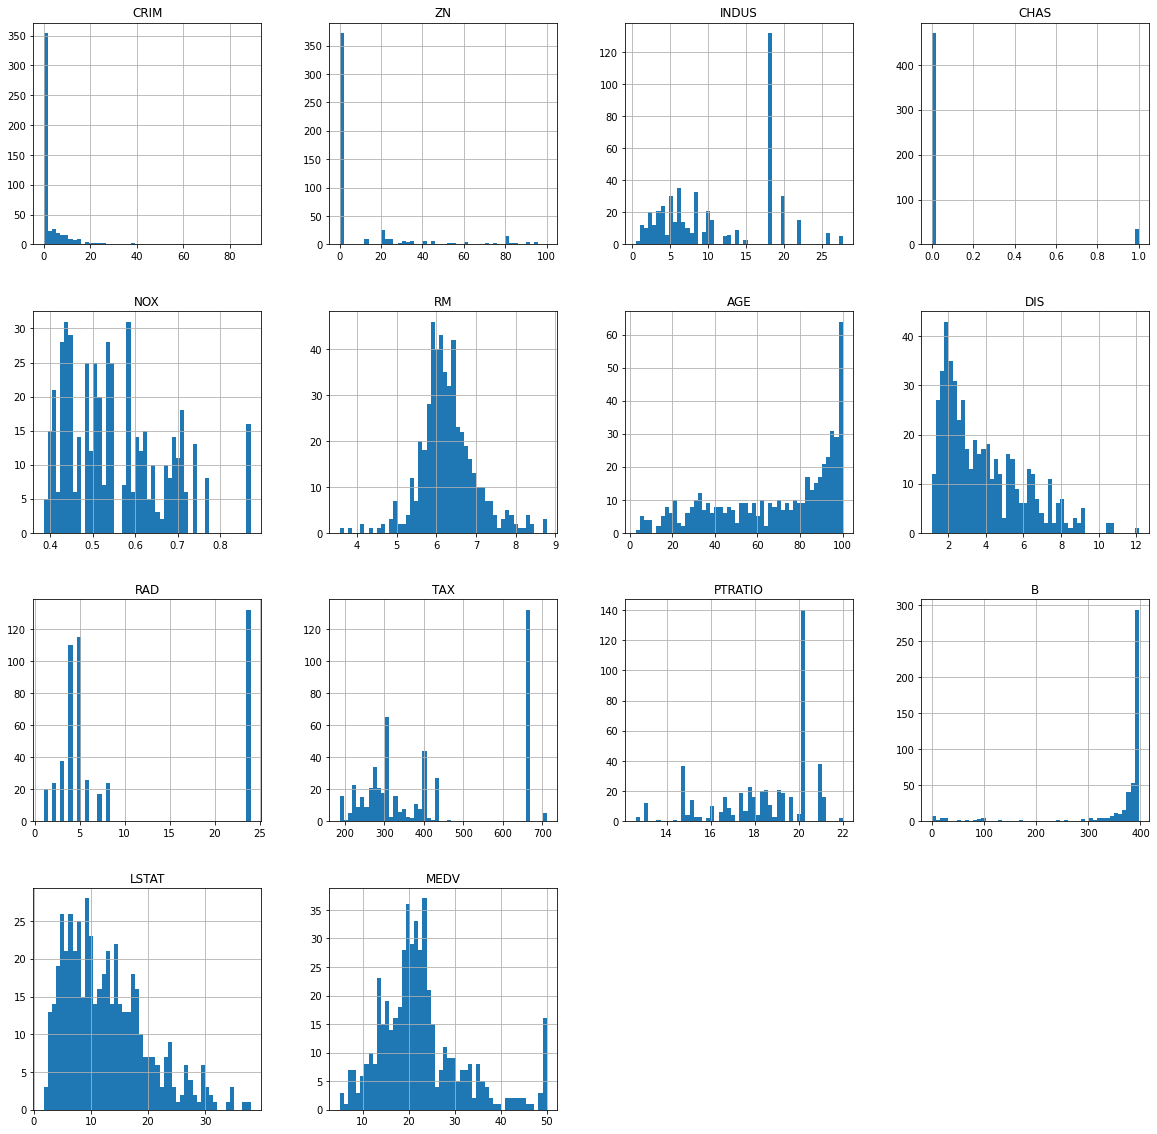

In [9]:
housing.hist(bins=50,figsize=(20,20))

In [10]:
#looking for correlation 
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695375
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [11]:
#for make sure that CHAS test data contain both(0,1)
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing.CHAS):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]


In [12]:
#splitting data
housing_tr=strat_train_set.iloc[:,:13]
housing_label=strat_train_set.iloc[:,13]

test_housing=strat_test_set.iloc[:,:13]
test_label=strat_test_set.iloc[:,13]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59c0cd3e10>,
      dtype=object)

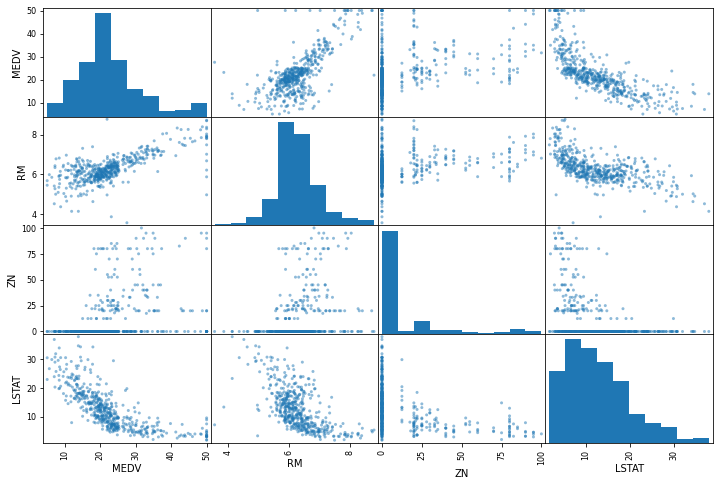

In [13]:
# visualization for core insight 
from pandas.plotting import scatter_matrix
attribute=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attribute],figsize=(12,8))

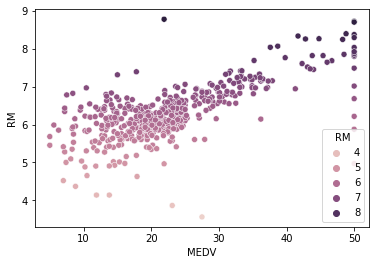

In [14]:
#positive correaltion visualtion between MEDV AND RM
sns.scatterplot(data=housing, x="MEDV", y="RM", hue="RM")


CREATING PIPELINE

In [15]:
# another way to preprocessing data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])
housing_tr1=my_pipeline.fit_transform(housing_tr)
housing_tr1.shape

(404, 13)

In [16]:
prepared_data=my_pipeline.fit_transform(test_housing)


MODEL SELECTION AND PREDICTION

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [18]:
# Defining the models i am going to use into a list
classifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
    ]
    

model=[]
# Iterate through each classification model stated above, fitting the model to the train data and finally    printing the accuracy and log loss of each model

for clf in classifiers:
    model=clf.fit(housing_tr1,housing_label)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('Results')
    model_predictions = clf.predict(test_housing)

    
    score=cross_val_score(model,housing_tr1,housing_label,scoring='neg_mean_squared_error',cv=10) 
    rmse_score=np.sqrt(-score)
    print(rmse_score)
    print('Mean:',rmse_score.mean())
    print('STD:',rmse_score.std())

    
print("="*30)


LinearRegression
Results
[4.22563467 4.26478192 5.09834517 3.83086704 5.37271111 4.42192611
 7.47073098 5.4893602  4.14323333 6.07119457]
Mean: 5.0388785101605755
STD: 1.0583095237953608
DecisionTreeRegressor
Results
[3.74344956 5.66628884 5.1188318  3.75090233 3.97237335 2.85372564
 4.46771754 3.5554184  3.5706442  3.96150224]
Mean: 4.06608539001594
STD: 0.7764951532689318
RandomForestRegressor
Results
[2.91861285 2.55782415 4.47110809 2.60340334 3.27241634 2.72371829
 4.87704954 3.40399098 3.05975754 3.10459786]
Mean: 3.2992478978395035
STD: 0.7402483258383595


In [19]:
best_model=RandomForestRegressor()
best_model.fit(housing_tr1,housing_label)
best_pred=best_model.predict(test_housing)

In [20]:
#checking best model predictions
view=pd.DataFrame({'real':test_label,'predicted:':best_pred})
view.head(50)

,real,predicted:
342,16.5,22.658
379,10.2,22.654
223,30.1,22.687
219,23.0,22.658
48,14.4,22.661
134,15.6,22.945
49,19.4,22.654
448,14.1,22.548
197,30.3,22.654
273,35.2,22.672


In [21]:
from joblib import dump,load

dump(best_model,'filename.joblib')

['filename.joblib']

In [22]:
#for load model
model=load('filename.joblib')
